# Setup environment

In [1]:
!pip install -q gym
!pip install -q ale-py
!pip install -q Pygame
!pip install --upgrade opencv-contrib-python

     |████████████████████████████████| 1.7 MB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Get ROMs from here: http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html
# More info:https://brosa.ca/blog/ale-release-v0.7

In [4]:
!gdown --id 1055Ah42P3nHfOv_xH6RRTtBKGfpdbuNQ --quiet
!unrar e Roms.rar
# when it shows [Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit  ------> just terminate the cell

mkdir: cannot create directory ‘roms/’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 377, in _make_request
    httplib_response = conn.getresponse(buffering=True)
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/http/client.py", line 1373, in getresponse
    response.begin()
  File "/usr/lib/python3.7/http/client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.7/http/client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/py

In [ ]:
!ale-import-roms .

# Start

In [5]:
import ale_py
import gym
from gym.utils.env_checker import check_env
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [6]:
import ale_py.roms as roms
print('Asteroids' in dir(roms))
print(dir(roms))

['Adventure', 'AirRaid', 'Alien', 'Amidar', 'Assault', 'Asterix', 'Asteroids', 'Atlantis', 'Atlantis2', 'Backgammon', 'BankHeist', 'BasicMath', 'BattleZone', 'BeamRider', 'Berzerk', 'Blackjack', 'Bowling', 'Boxing', 'Breakout', 'Carnival', 'Casino', 'Centipede', 'ChopperCommand', 'CrazyClimber', 'Crossbow', 'Darkchambers', 'Defender', 'DemonAttack', 'DonkeyKong', 'DoubleDunk', 'Earthworld', 'ElevatorAction', 'Enduro', 'Entombed', 'Et', 'FishingDerby', 'FlagCapture', 'Freeway', 'Frogger', 'Frostbite', 'Galaxian', 'Gopher', 'Gravitar', 'Hangman', 'HauntedHouse', 'Hero', 'HumanCannonball', 'IceHockey', 'Jamesbond', 'JourneyEscape', 'Kaboom', 'Kangaroo', 'KeystoneKapers', 'KingKong', 'Klax', 'Koolaid', 'Krull', 'KungFuMaster', 'LaserGates', 'LostLuggage', 'MarioBros', 'MiniatureGolf', 'MontezumaRevenge', 'MrDo', 'MsPacman', 'NameThisGame', 'Othello', 'Pacman', 'Phoenix', 'Pitfall', 'Pitfall2', 'Pong', 'Pooyan', 'PrivateEye', 'Qbert', 'Riverraid', 'RoadRunner', 'Robotank', 'Seaquest', 'SirL

In [8]:
# import ale_py
# from ale_py import ALEInterface
# from ale_py.roms import Asteroids

# ale = ALEInterface()
# ale.loadROM(Asteroids)

In [47]:
import gym
env = gym.make("ALE/Asteroids-v5", render_mode='rgb_array', full_action_space=True, obs_type='rgb') # https://www.gymlibrary.dev/environments/atari/#common-arguments

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [36]:
observation, info = env.reset(seed=42)
# observation: game show
action = env.action_space.sample()
action
# https://www.gymlibrary.dev/environments/atari/asteroids/ Action meanings

2

In [35]:
env.observation_space.sample().shape

(210, 160)

In [42]:
out = env.step(action)
obs, score, done, status = out
obs, score, done, status

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 0.0,
 False,
 {'lives': 4, 'episode_frame_number': 20, 'frame_number': 20})

In [49]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{} for action:{} n_state.shape:{}'.format(episode, score, action, n_state.shape))

Episode:1 Score:440.0 for action:14 n_state.shape:(210, 160, 3)
Episode:2 Score:380.0 for action:15 n_state.shape:(210, 160, 3)
Episode:3 Score:1080.0 for action:3 n_state.shape:(210, 160, 3)
Episode:4 Score:880.0 for action:1 n_state.shape:(210, 160, 3)
Episode:5 Score:1410.0 for action:2 n_state.shape:(210, 160, 3)
Episode:6 Score:210.0 for action:1 n_state.shape:(210, 160, 3)
Episode:7 Score:530.0 for action:6 n_state.shape:(210, 160, 3)
Episode:8 Score:880.0 for action:0 n_state.shape:(210, 160, 3)
Episode:9 Score:930.0 for action:16 n_state.shape:(210, 160, 3)
Episode:10 Score:830.0 for action:4 n_state.shape:(210, 160, 3)


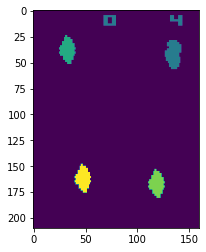

In [13]:
plt.imshow(observation)

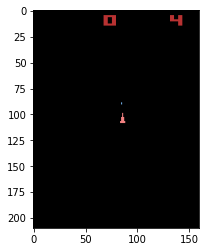

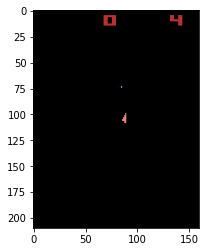

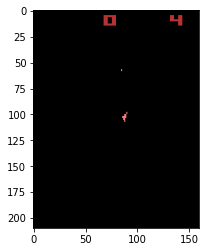

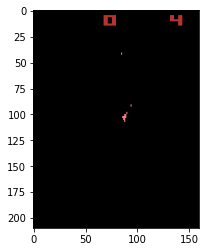

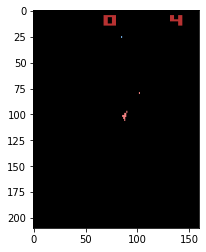

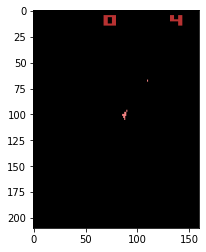

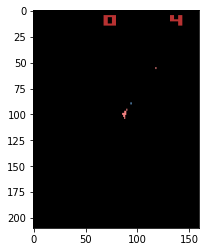

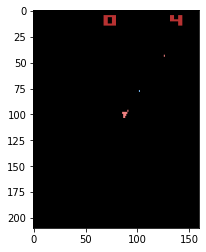

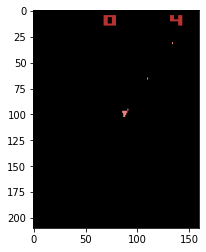

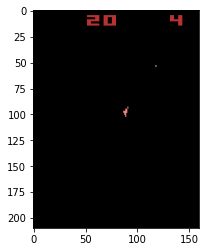

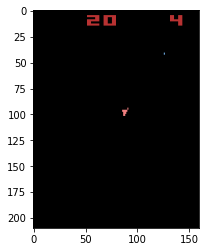

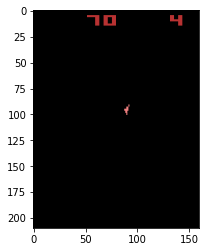

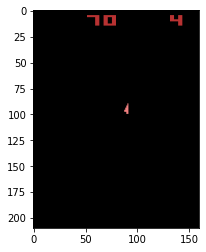

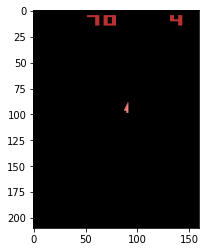

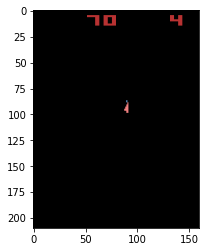

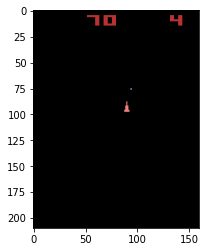

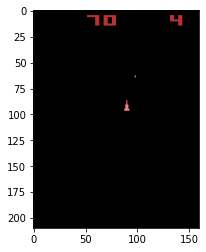

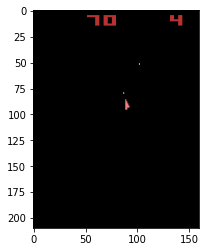

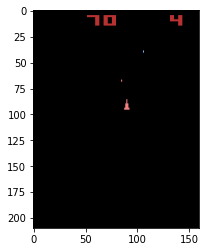

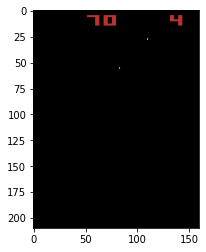

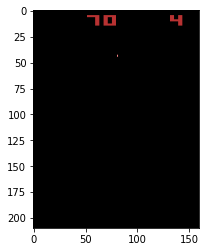

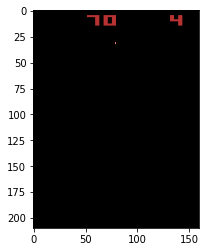

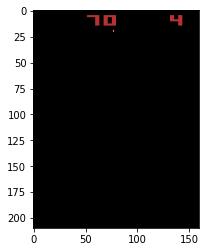

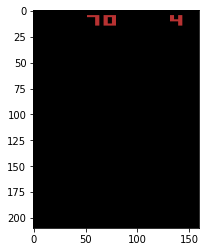

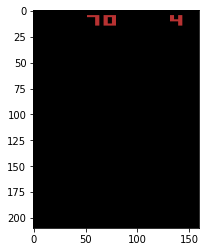

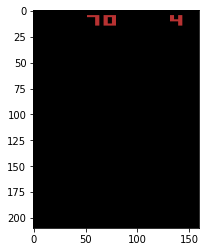

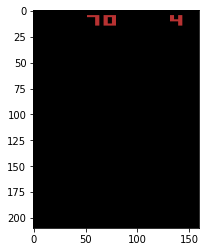

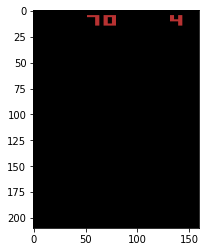

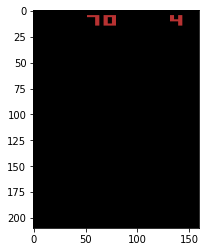

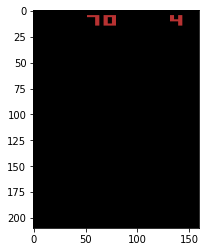

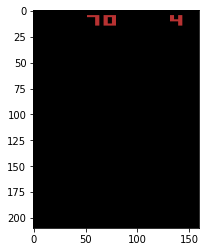

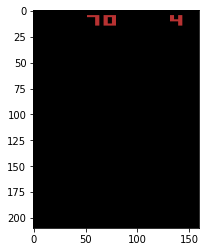

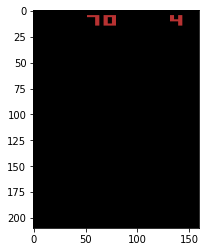

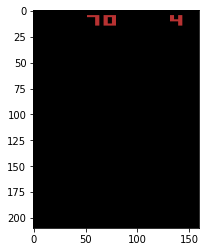

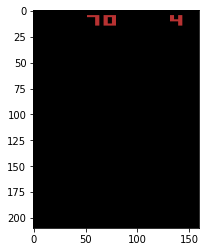

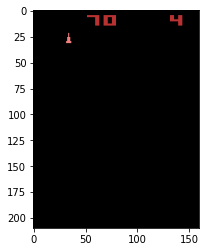

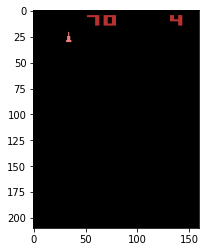

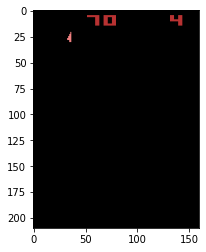

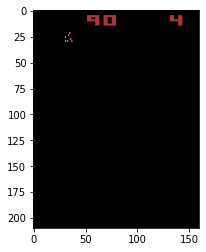

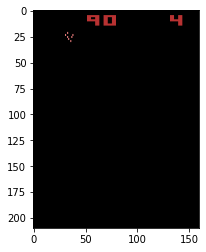

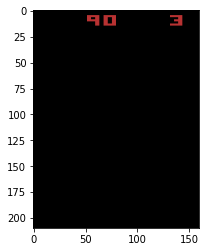

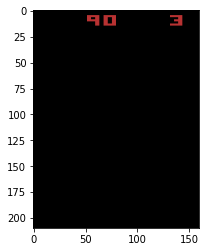

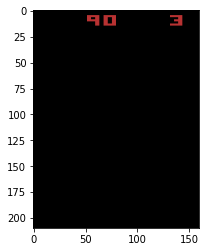

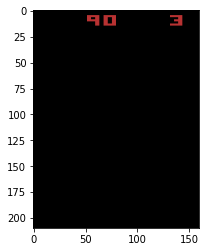

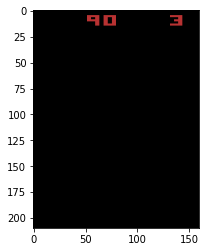

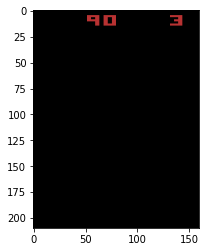

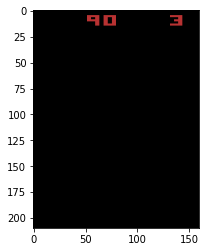

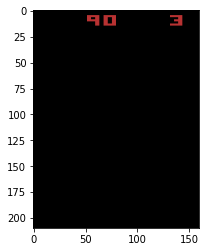

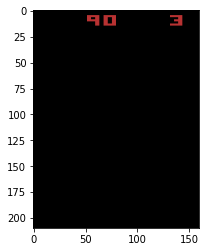

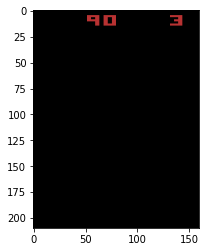

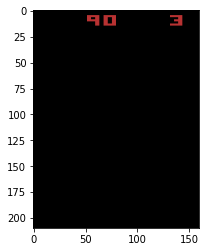

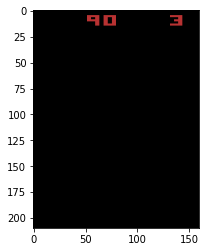

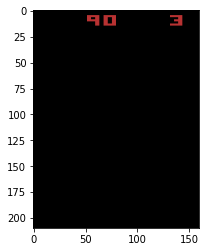

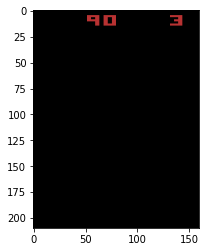

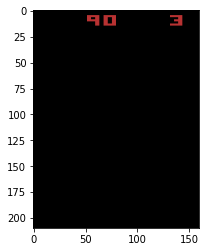

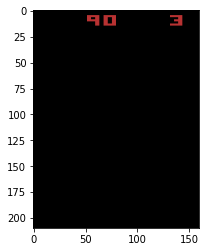

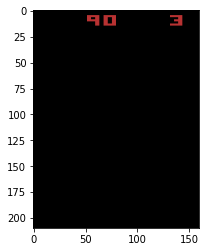

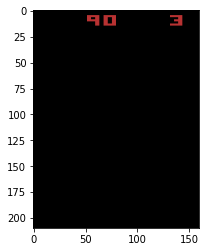

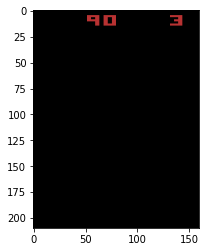

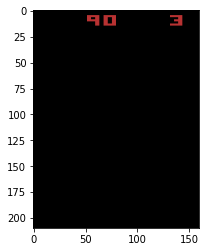

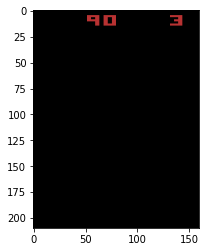

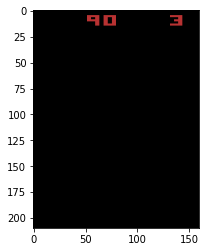

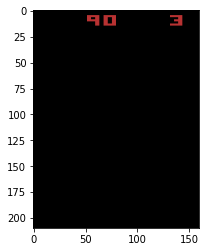

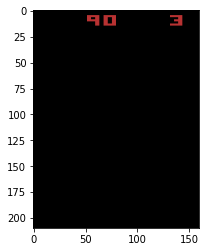

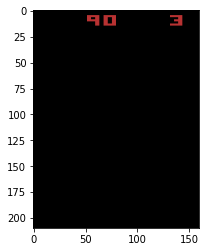

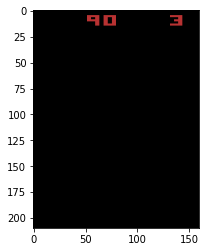

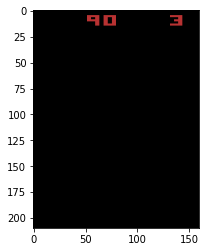

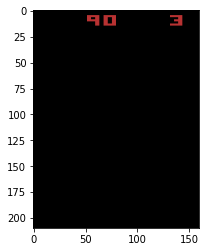

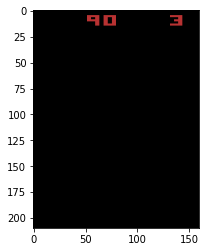

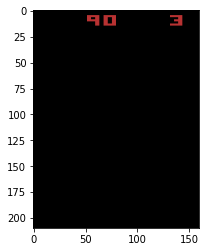

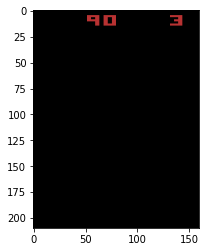

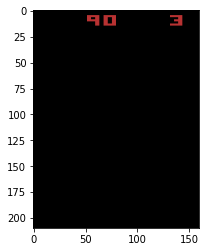

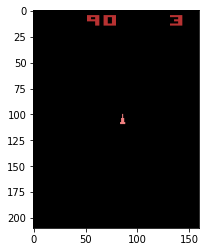

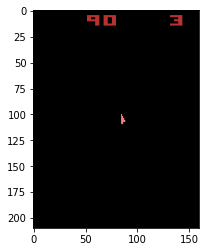

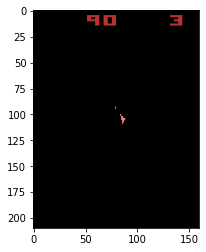

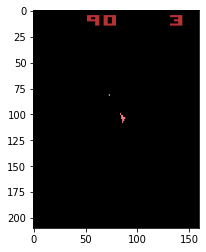

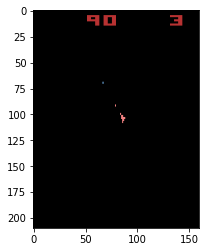

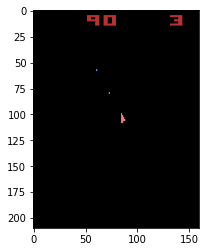

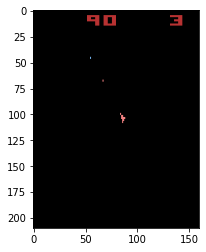

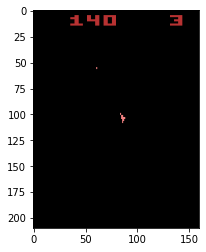

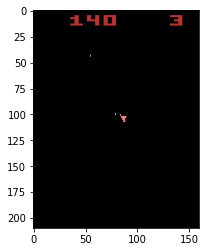

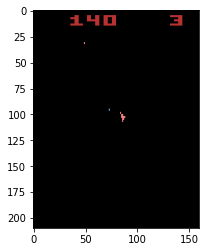

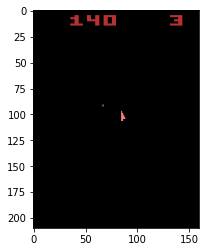

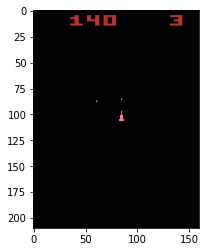

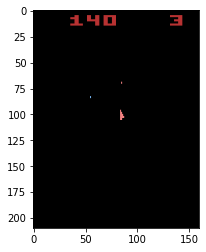

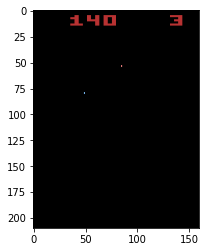

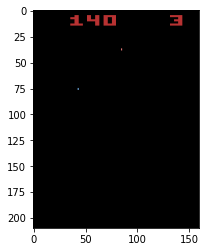

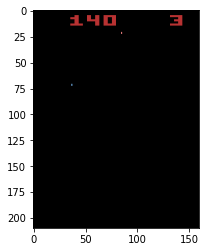

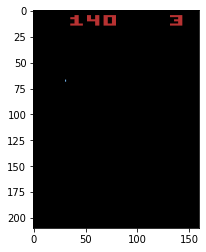

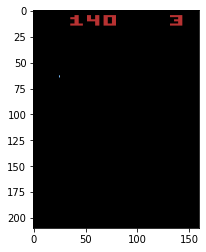

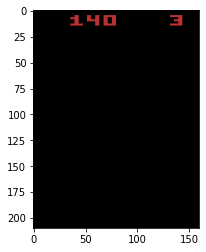

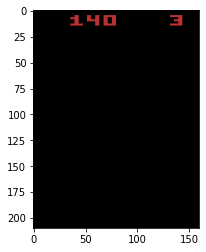

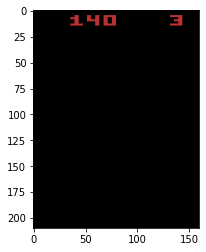

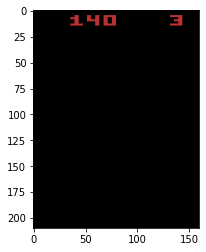

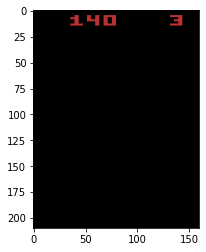

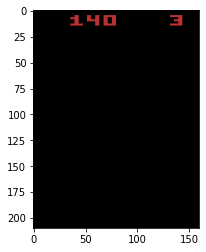

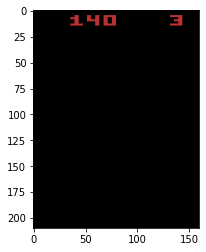

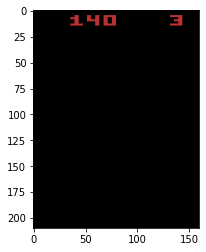

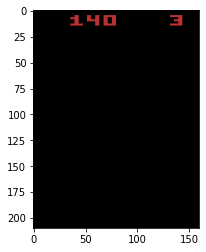

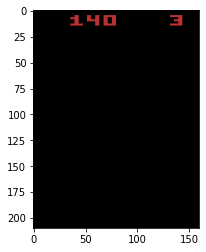

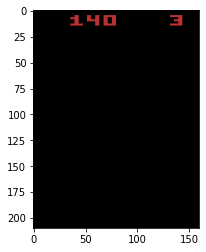

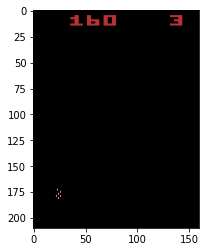

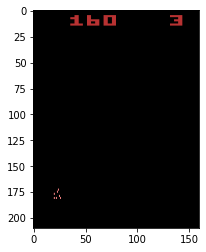

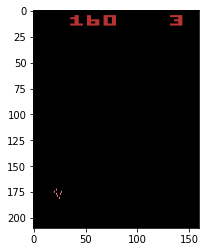

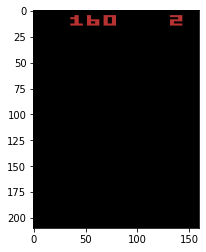

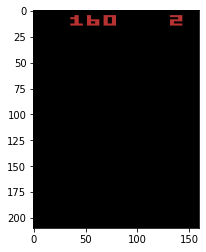

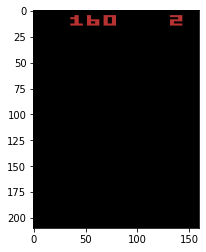

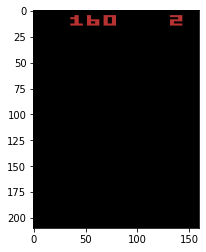

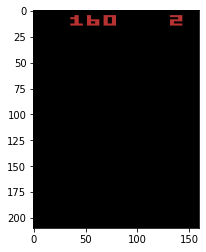

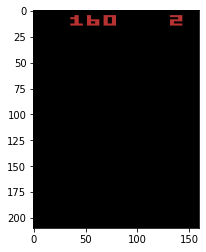

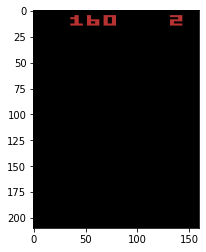

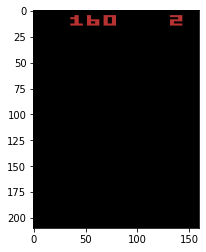

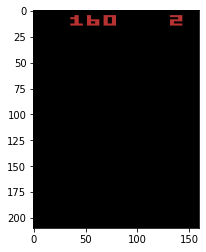

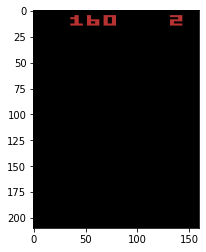

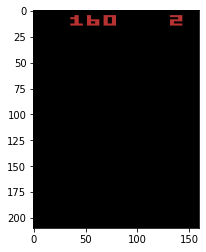

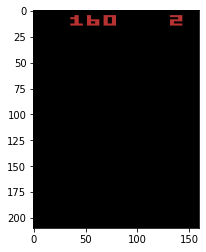

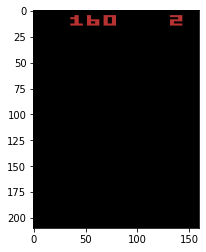

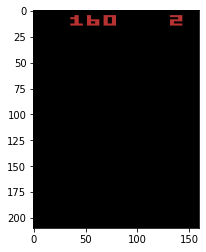

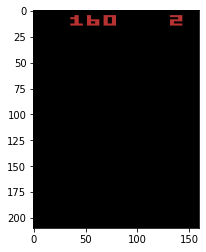

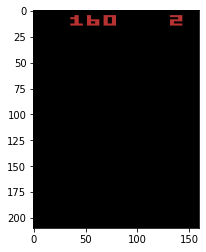

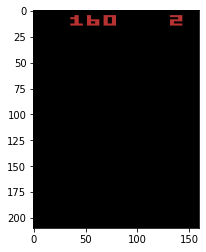

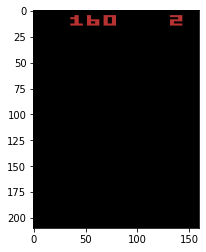

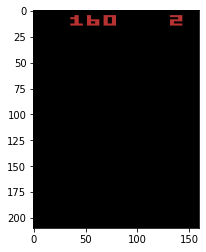

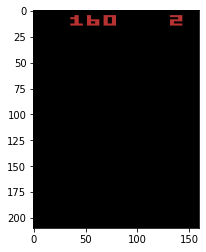

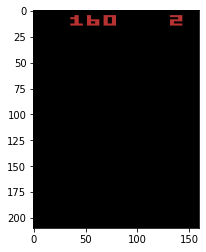

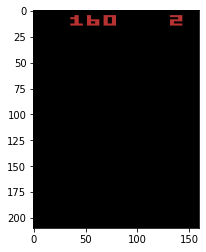

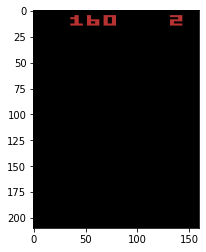

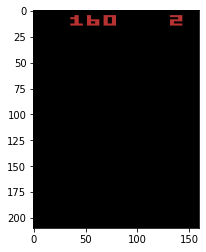

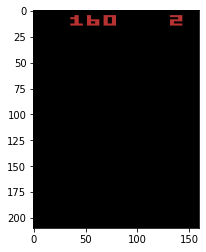

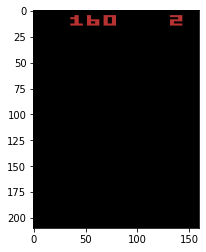

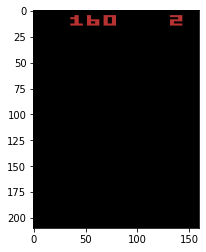

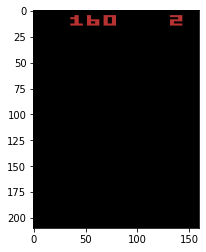

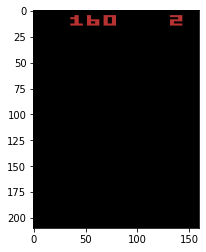

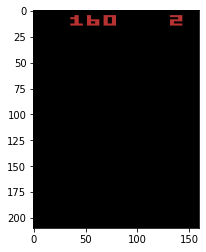

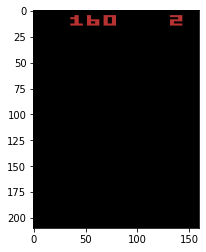

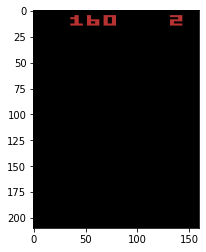

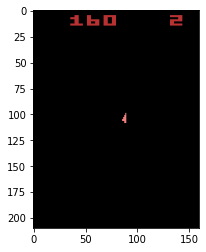

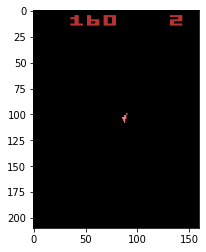

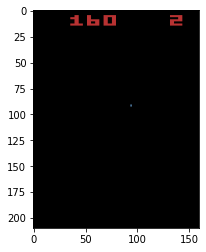

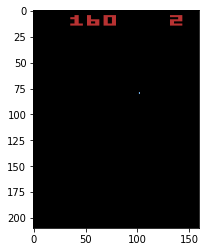

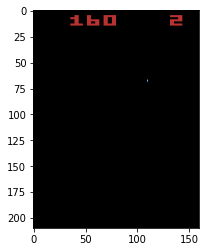

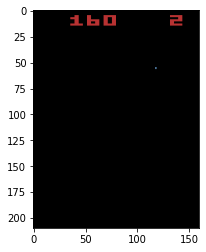

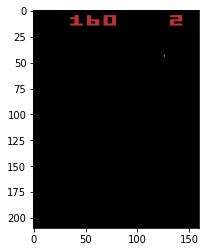

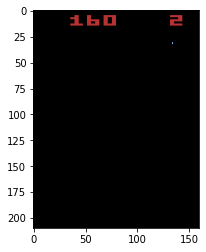

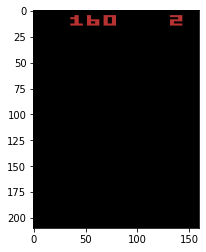

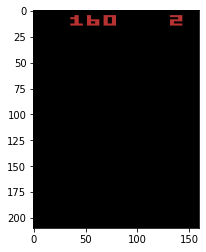

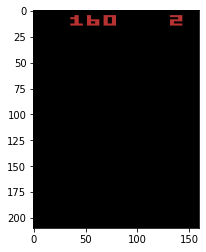

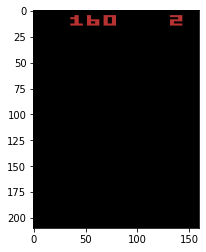

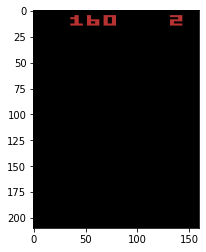

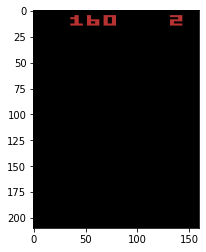

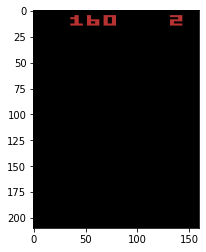

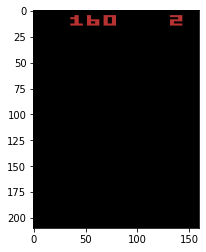

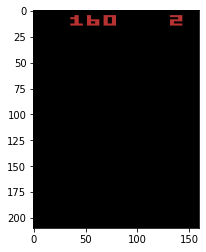

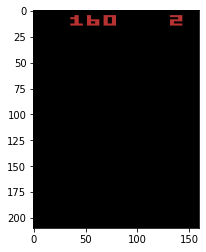

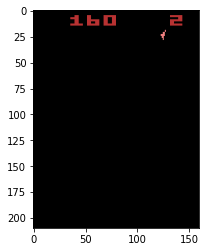

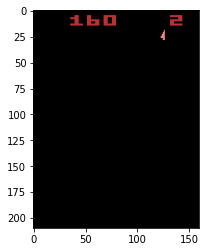

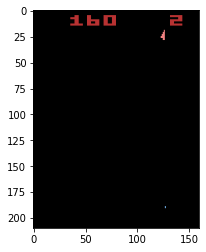

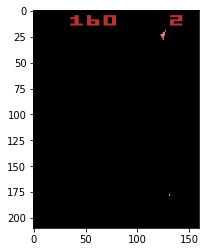

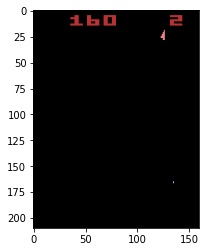

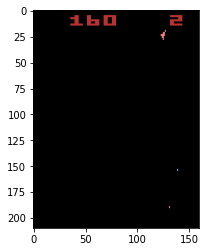

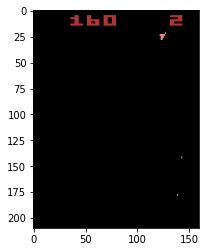

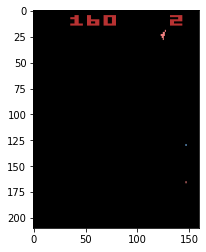

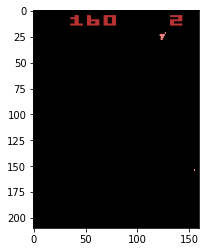

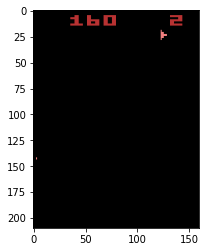

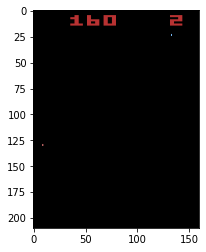

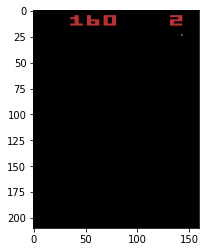

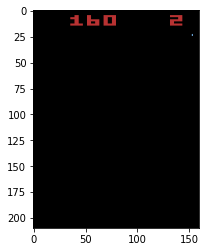

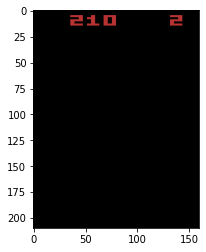

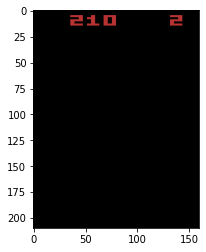

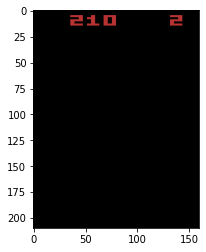

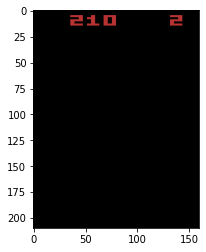

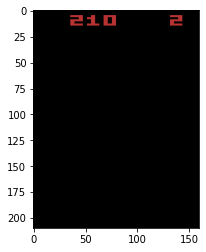

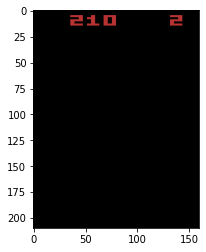

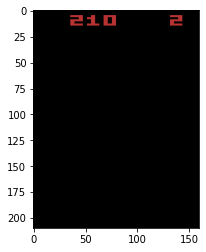

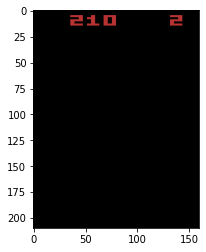

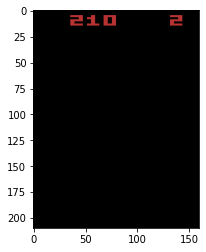

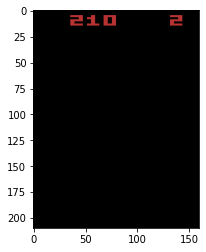

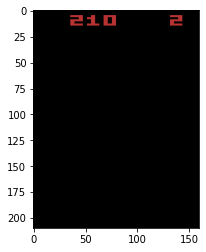

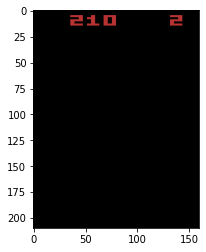

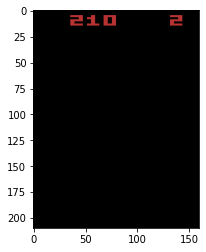

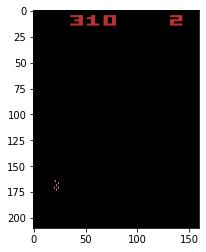

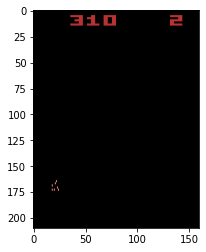

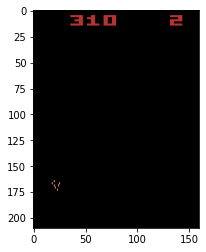

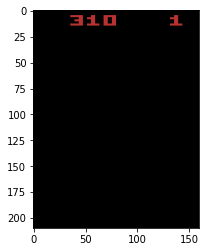

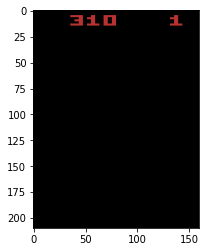

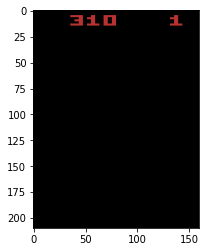

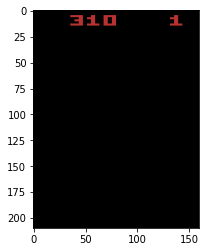

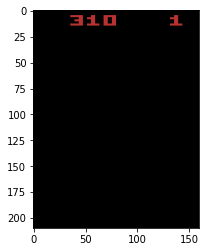

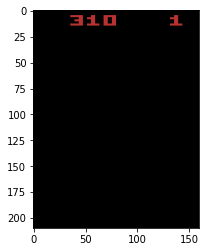

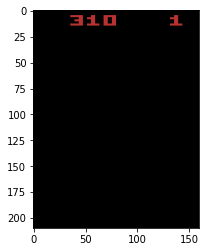

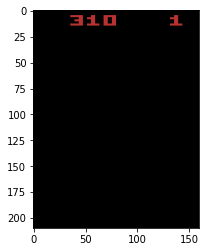

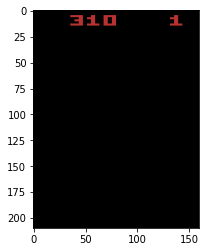

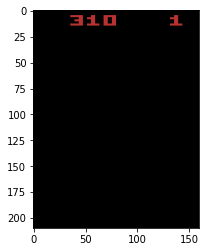

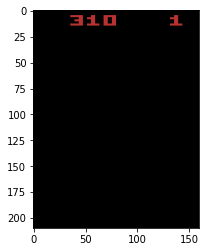

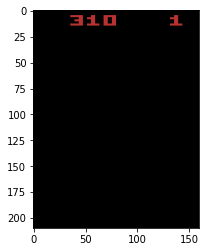

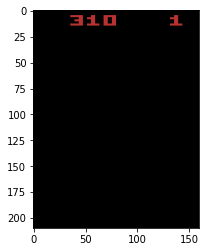

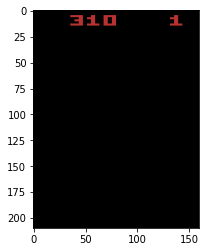

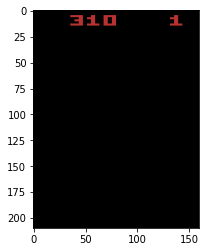

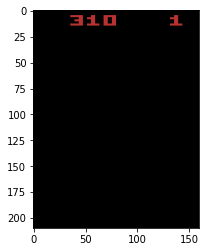

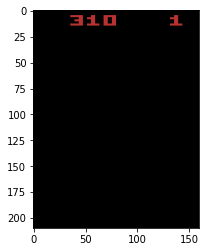

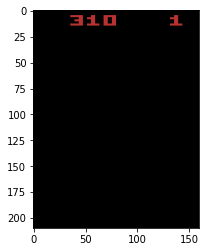

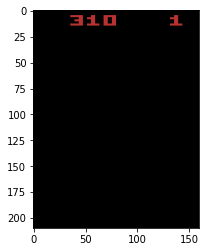

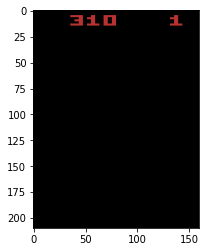

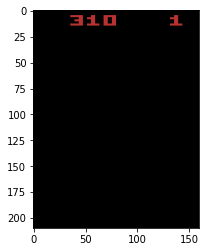

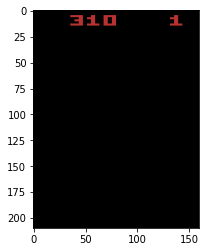

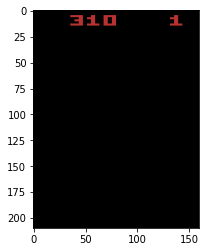

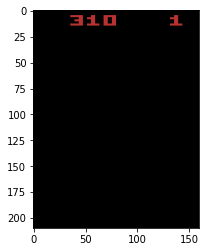

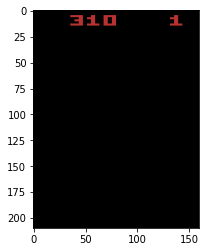

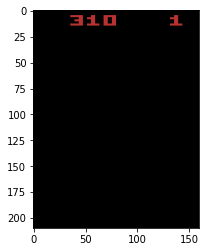

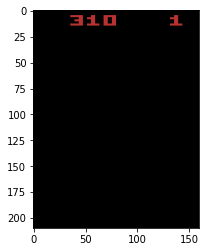

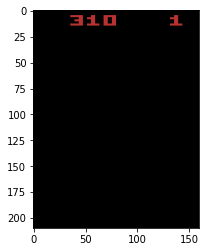

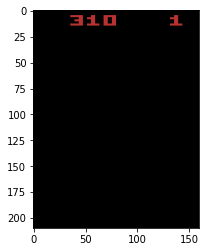

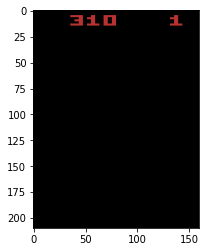

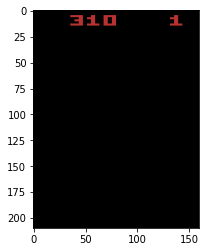

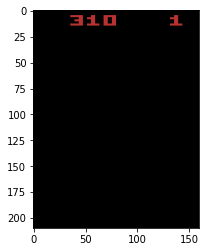

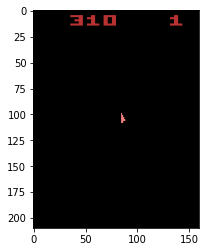

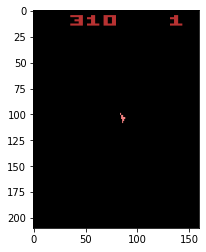

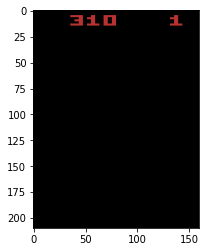

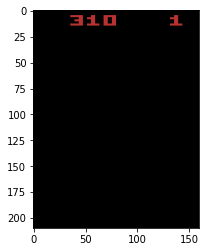

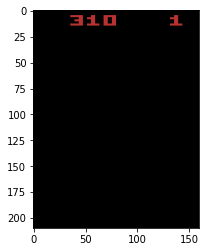

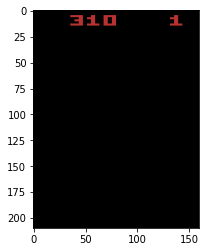

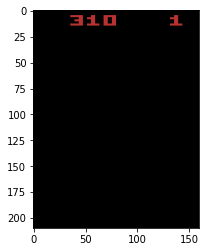

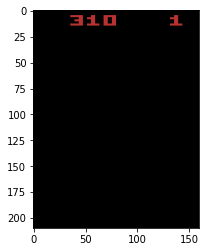

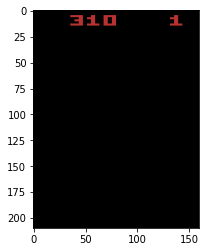

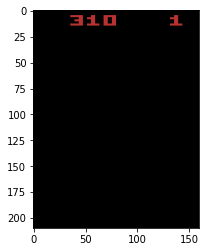

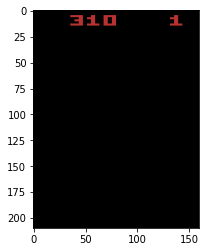

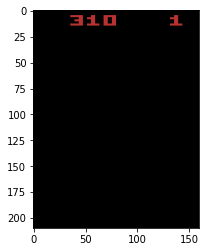

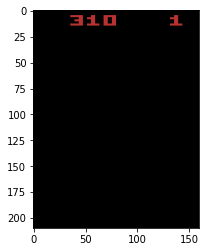

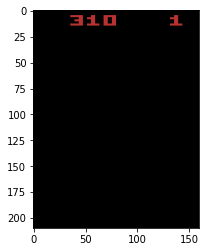

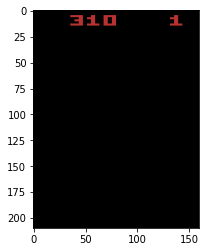

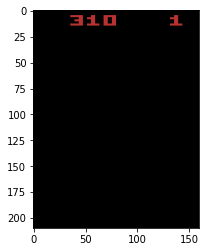

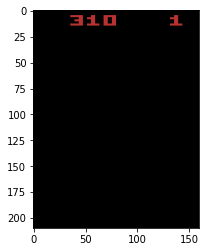

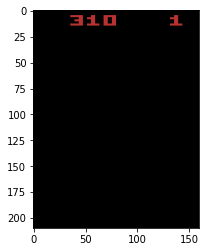

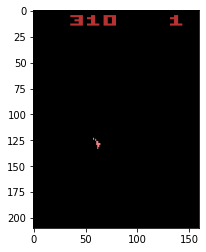

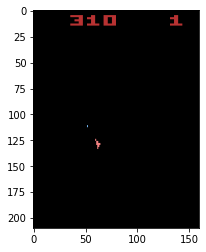

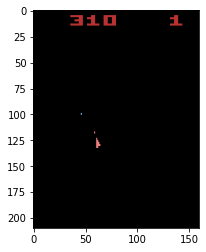

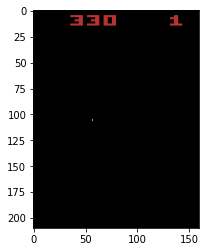

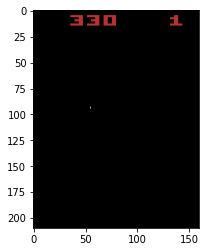

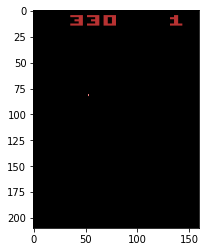

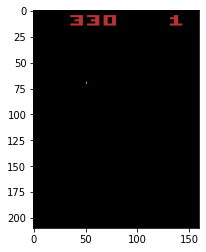

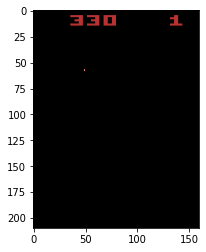

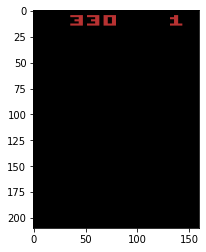

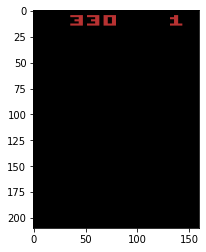

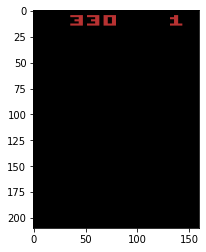

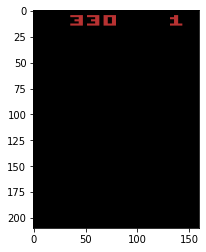

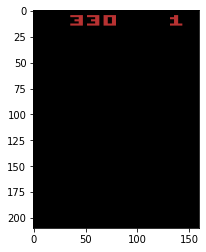

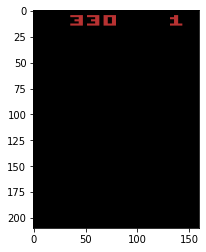

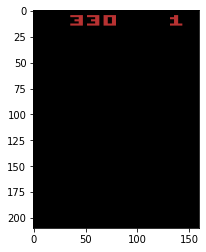

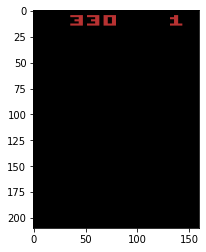

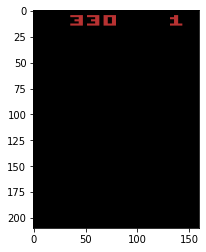

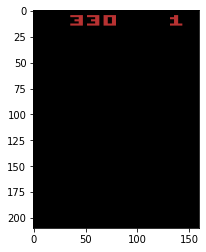

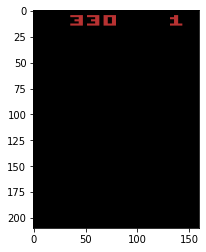

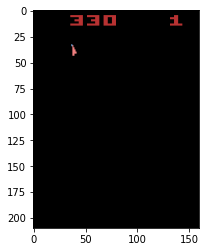

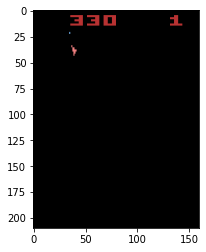

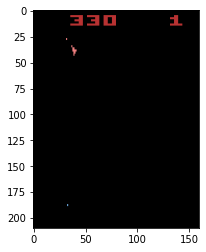

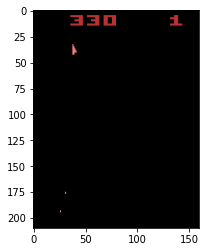

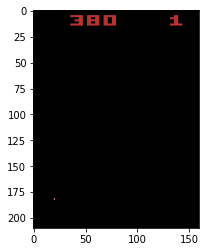

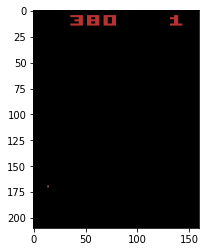

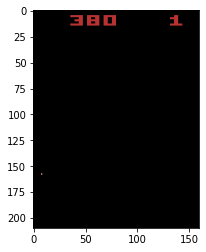

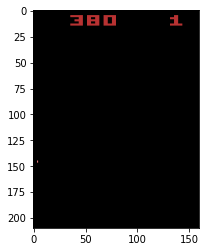

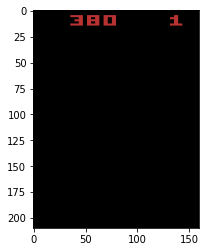

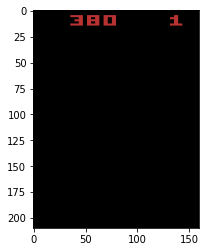

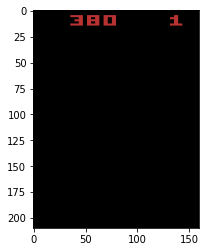

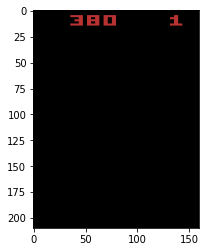

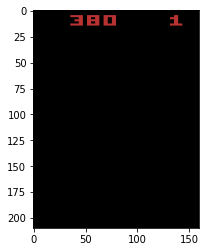

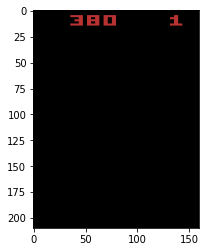

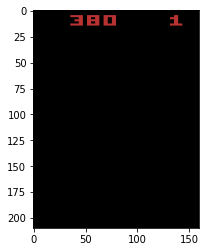

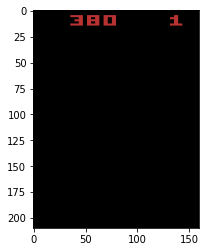

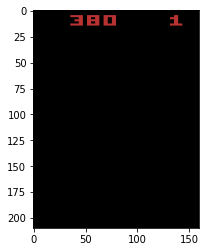

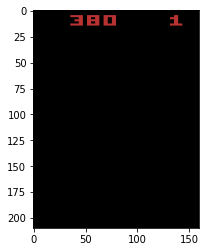

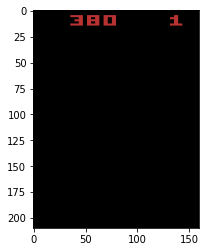

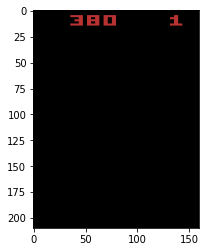

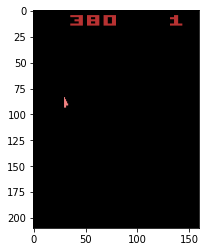

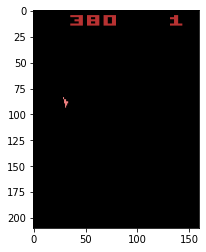

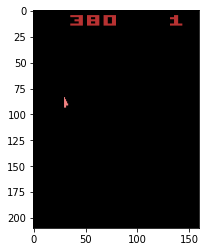

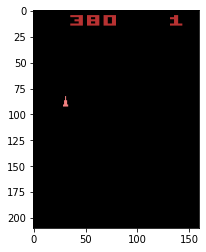

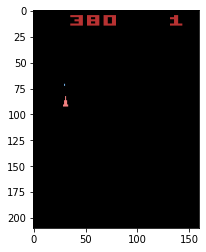

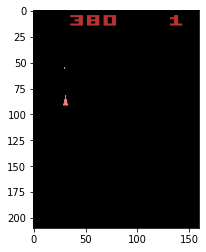

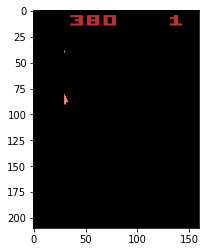

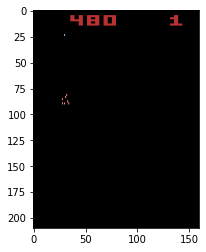

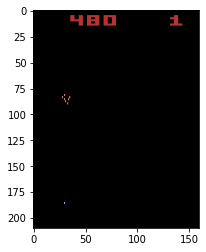

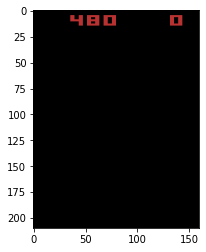

Episode:0 Score:480.0 for action:17


In [50]:
for episode in range(1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward

        plt.imshow(n_state)
        plt.show()
    print('Episode:{} Score:{} for action:{}'.format(episode, score, action))

In [14]:
x = env.render()
x.shape

(210, 160, 3)

In [54]:
env.action_space

Discrete(18)

In [ ]:
# Model output: env.action_space
# Another example: https://www.youtube.com/watch?v=bD6V3rcr_54 (src code; https://github.com/nicknochnack/OpenAI-Reinforcement-Learning-with-Custom-Environment)